# Correlation between entropy/FD metrics

Requires the [seaborn](https://seaborn.pydata.org/) and [pingouin](https://pingouin-stats.org) packages.

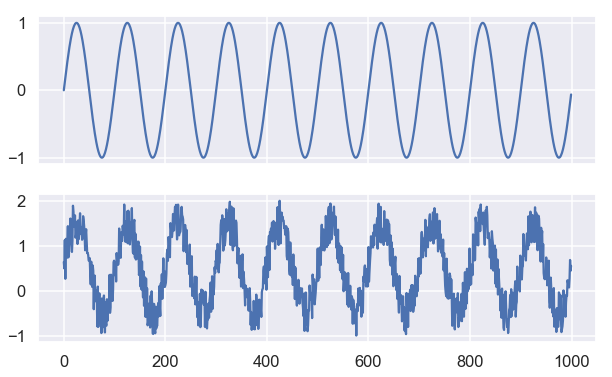

In [1]:
from entropy import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='talk')

df = pd.DataFrame()

# Generate 1000 1Hz sines with increasing noise
np.random.seed(123)
N = 1000
sf = 100
n_sines = 100
noises_factor = np.linspace(0, 1, n_sines)
noises = np.random.rand(n_sines, N)
sines = np.zeros(shape=(n_sines, N))
for i in range(n_sines):
    sines[i] = np.sin(2 * np.pi * np.arange(N) / sf) + noises_factor[i] * noises[i, :]
    
# Plot the first and last sines
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=False)
ax1.plot(sines[0])
ax2.plot(sines[-1])

In [2]:
# Compute the entropy metrics
for i in range(n_sines):
    df = df.append({'PermEnt': perm_entropy(sines[i], order=3, normalize=True),
                    'SVDEnt' : svd_entropy(sines[i], order=3, normalize=True),
                    'SpecEnt' : spectral_entropy(sines[i], sf, method='welch', normalize=True),
                    'AppEnt': app_entropy(sines[i], order=2),
                    'SampleEnt': sample_entropy(sines[i], order=2),
                    'PetrosianFD': petrosian_fd(sines[i]),
                    'KatzFD': katz_fd(sines[i]),
                    'HiguchiFD': higuchi_fd(sines[i]),
                    # 'DFA': detrended_fluctuation(sines[i])
                   }, ignore_index=True)

df.head()

,AppEnt,HiguchiFD,KatzFD,PermEnt,PetrosianFD,SVDEnt,SampleEnt,SpecEnt
0,0.200446,1.013872,2.145324,0.447237,1.001155,0.177294,0.163998,0.184779
1,0.201632,1.014700,2.141333,0.482647,1.001959,0.192173,0.164015,0.184847
2,0.203127,1.016756,2.144228,0.536770,1.003445,0.204147,0.165197,0.184923
3,0.211145,1.019776,2.137527,0.610048,1.005823,0.213686,0.168862,0.185038
4,0.224220,1.026540,2.147726,0.625656,1.006385,0.224054,0.175752,0.185502


## Pairwise correlations

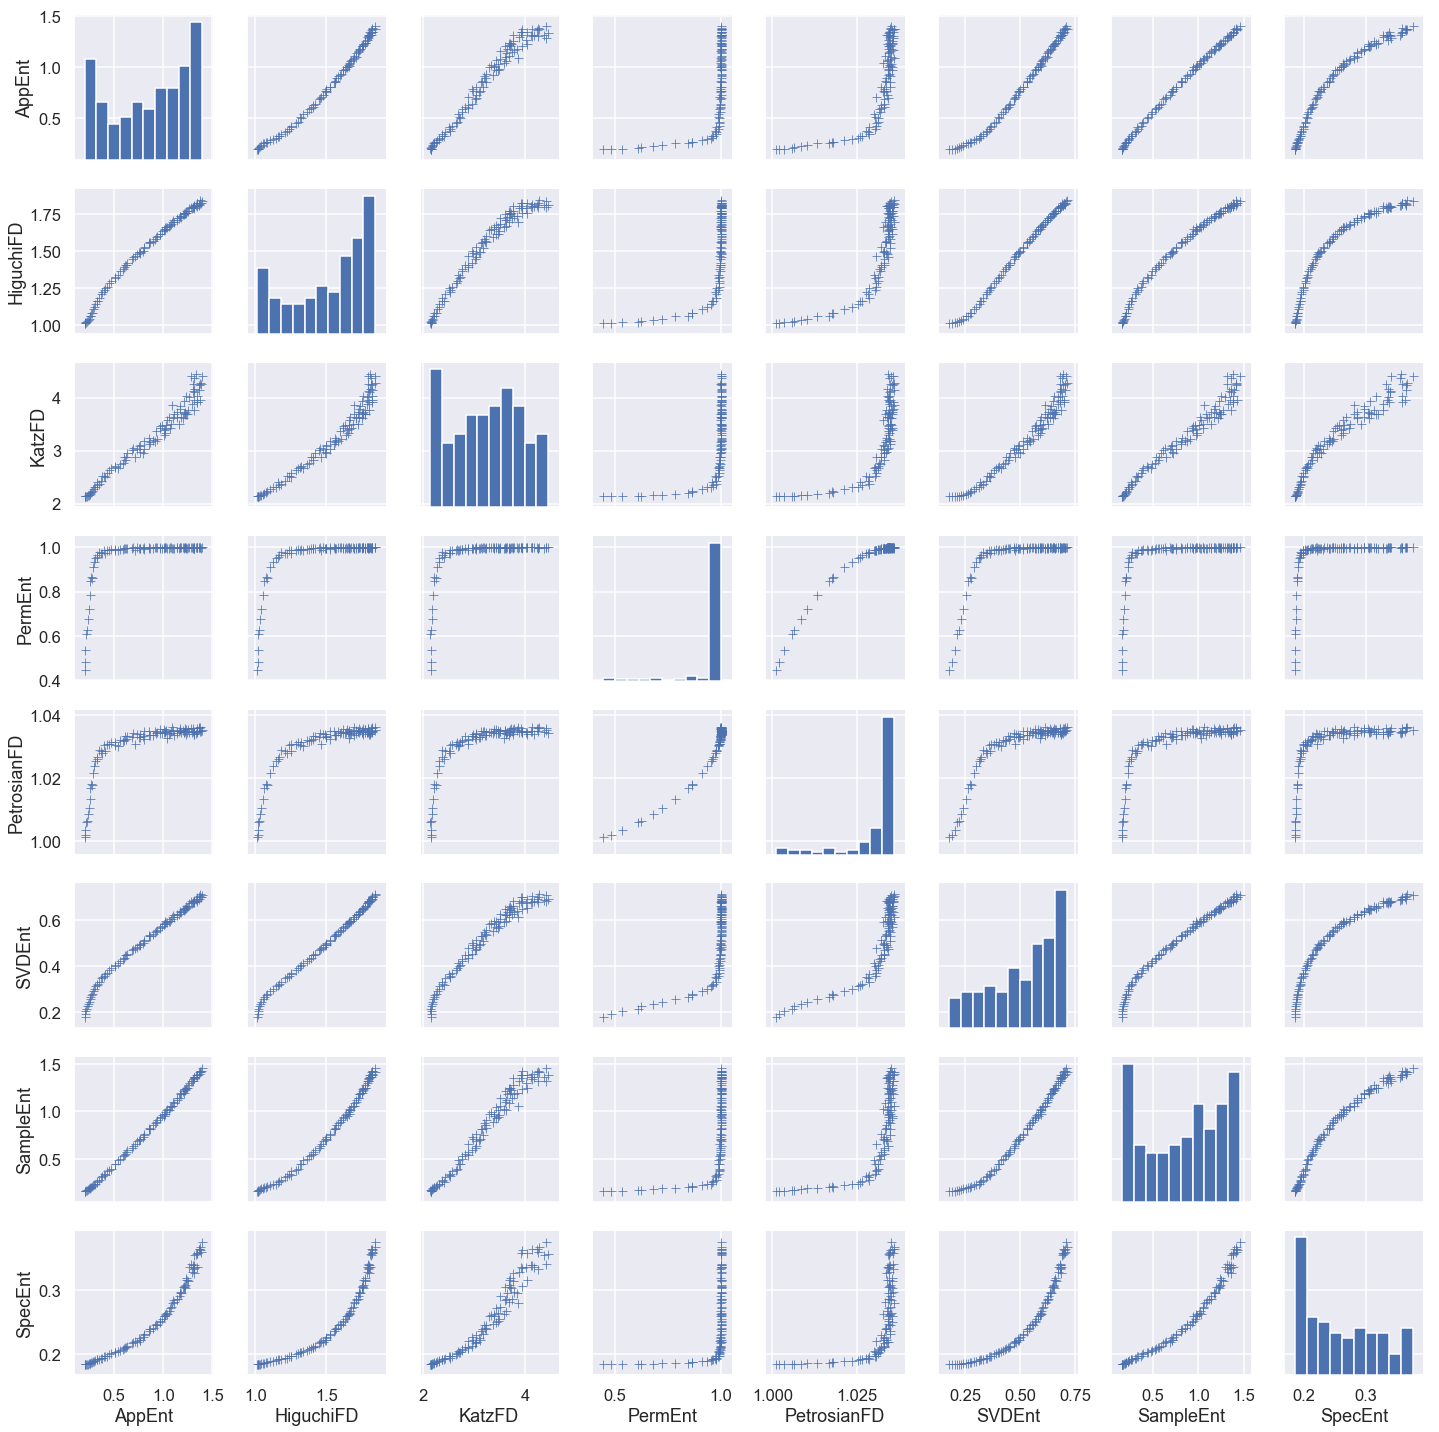

In [3]:
sns.pairplot(df, markers='+')

In [4]:
from pingouin import pairwise_corr
pairwise_corr(df).sort_values(by=['r2'], ascending=False)

,X,Y,method,tail,r,CI95%,r2,adj_r2,z,p-unc,BF10
5,AppEnt,SampleEnt,pearson,two-sided,0.999,"[1.0, 1.0]",0.998,0.998,3.800,6.866553e-131,4.646135e+126
10,HiguchiFD,SVDEnt,pearson,two-sided,0.998,"[1.0, 1.0]",0.996,0.996,3.453,6.693537e-122,5.890406e+117
0,AppEnt,HiguchiFD,pearson,two-sided,0.992,"[0.99, 0.99]",0.984,0.983,2.759,2.281118e-89,3.734392e+85
4,AppEnt,SVDEnt,pearson,two-sided,0.991,"[0.99, 0.99]",0.983,0.983,2.700,2.248765e-88,3.879040e+84
25,SVDEnt,SampleEnt,pearson,two-sided,0.986,"[0.98, 0.99]",0.971,0.971,2.477,1.831064e-77,6.189555e+73
11,HiguchiFD,SampleEnt,pearson,two-sided,0.986,"[0.98, 0.99]",0.971,0.971,2.477,1.882723e-77,6.021479e+73
16,KatzFD,SampleEnt,pearson,two-sided,0.983,"[0.98, 0.99]",0.967,0.966,2.380,3.952729e-74,3.108094e+70
1,AppEnt,KatzFD,pearson,two-sided,0.981,"[0.97, 0.99]",0.963,0.963,2.323,3.705692e-72,3.477923e+68
15,KatzFD,SVDEnt,pearson,two-sided,0.973,"[0.96, 0.98]",0.947,0.946,2.146,1.976443e-64,7.880016e+60
7,HiguchiFD,KatzFD,pearson,two-sided,0.971,"[0.96, 0.98]",0.944,0.942,2.110,5.517650e-63,2.925485e+59


## Clustermap

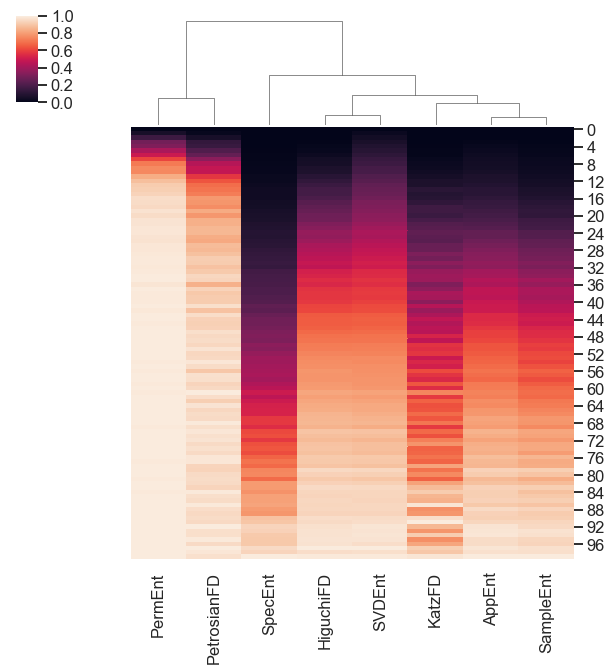

In [5]:
sns.clustermap(df, row_cluster=False, standard_scale=1)